In [1]:
import numpy as np
import pandas as pd
from config import split_date, momentum_weights, file_path, column_names, bounds, constraints
from data_processing import load_data
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(20)

fn_data = load_data(file_path, column_names)
returns = fn_data.pct_change().dropna()

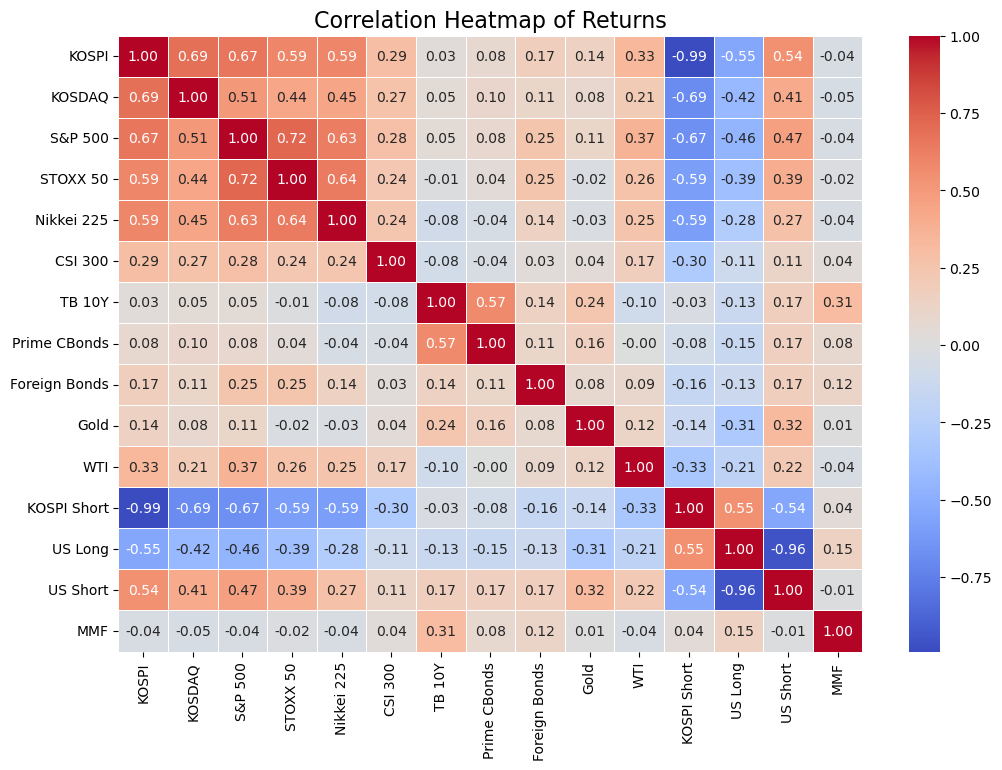

In [2]:
correlation_matrix = returns.corr() 

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Returns', fontsize=16)
plt.show()

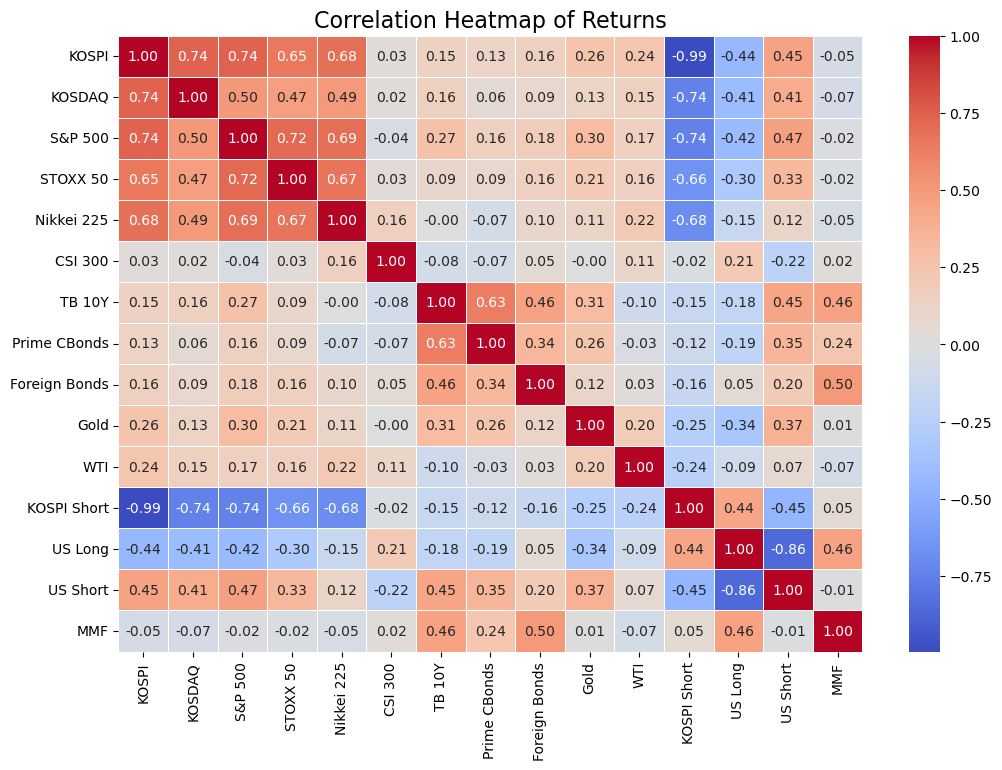

In [3]:
# Momentum factor heatmap 

# Step 1: Get the most recent 252 days of data
recent_252_days = returns.tail(252)

# Step 2: Remove the most recent 21 days to get the past 231 days (momentum window)
momentum_period = recent_252_days.iloc[:-21]

past_1_year_heatmap = momentum_period.corr() 

plt.figure(figsize=(12, 8))
sns.heatmap(past_1_year_heatmap, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Returns', fontsize=16)
plt.show()


### Weights Summary based on S&P 500 correlation factor

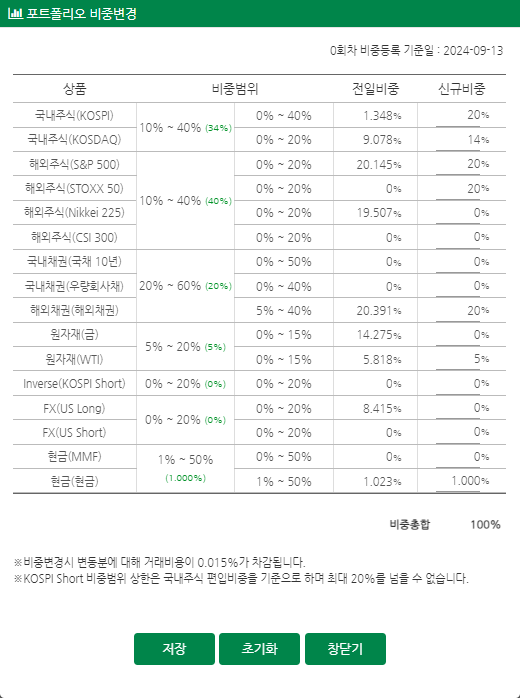